In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the directory containing images and CSV file
data_dir = '/content/drive/MyDrive/FPC'
images_dir = os.path.join(data_dir, 'images')
csv_file = os.path.join(data_dir, 'styles.csv')

# Load CSV file using Pandas
styles_df = pd.read_csv("/content/drive/MyDrive/FPC/styles.csv",on_bad_lines='skip')

# Print first few rows of the CSV to ensure it's loaded correctly
print(styles_df.head())

# Function to load and preprocess images
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Load images and corresponding labels
images = []
labels = []

for index, row in styles_df.iterrows():
    img_path = os.path.join(images_dir, row['images'])
    if os.path.exists(img_path):
        image = load_and_preprocess_image(img_path)
        images.append(image)
        labels.append(row['label'])  # Assuming there's a 'label' column in CSV

# Convert lists to NumPy arrays
images = tf.convert_to_tensor(images)
labels = tf.convert_to_tensor(labels)

# Print the shapes of the arrays to ensure they are loaded correctly
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

# Example of creating a TensorFlow Dataset (optional)
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset = dataset.shuffle(buffer_size=len(images)).batch(32)


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


KeyError: 'images'

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the directory containing images and CSV file
data_dir = '/content/drive/MyDrive/FPC'
images_dir = os.path.join(data_dir, 'images')
csv_file = os.path.join(data_dir, 'styles.csv')

# Load CSV file using Pandas
styles_df = pd.read_csv("/content/drive/MyDrive/FPC/styles.csv",on_bad_lines='skip')

# Print first few rows of the CSV to ensure it's loaded correctly
print(styles_df.head())

# Function to load and preprocess images
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Load images and corresponding labels
images = []
labels = []

for index, row in styles_df.iterrows():
    # Access the correct column name for image names (replace 'id' if necessary)
    img_path = os.path.join(images_dir, str(row['id']))
    if os.path.exists(img_path):
        image = load_and_preprocess_image(img_path)
        images.append(image)
        labels.append(row['label'])  # Assuming there's a 'label' column in CSV

# Convert lists to NumPy arrays
images = tf.convert_to_tensor(images)
labels = tf.convert_to_tensor(labels)

# Print the shapes of the arrays to ensure they are loaded correctly
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

# Example of creating a TensorFlow Dataset (optional)
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset = dataset.shuffle(buffer_size=len(images)).batch(32)

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  
Images shape: (0,)
Labels shape: (0,)


InvalidArgumentError: {{function_node __wrapped__ShuffleDatasetV3_device_/job:localhost/replica:0/task:0/device:CPU:0}} buffer_size must be greater than zero or UNKNOWN_CARDINALITY [Op:ShuffleDatasetV3] name: 

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the directory containing images and CSV file
data_dir = '/content/drive/MyDrive/FPC'
images_dir = os.path.join(data_dir, 'images')
csv_file = os.path.join(data_dir, 'styles.csv')

# Load CSV file using Pandas
df = pd.read_csv("/content/drive/MyDrive/FPC/styles.csv",on_bad_lines='skip')
df['image']=df.apply(lambda row:str(row['id'])+'.jpg',axis=1)
df=df.sample(frac=1).reset_index(drop=True)

# Print first few rows of the CSV to ensure it's loaded correctly
print(df.head())

# Function to load and preprocess images
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Load images and corresponding labels
images = []
id = []

for index, row in df.iterrows():
    # Access the correct column name for image names
    img_path = os.path.join(images_dir, str(row['id']))
    if os.path.exists(img_path):
        image = load_and_preprocess_image(img_path)
        images.append(image)
        labels.append(row['image'])  # Assuming there's a 'label' column in CSV

# Convert lists to NumPy arrays
images = tf.convert_to_tensor(image)
labels = tf.convert_to_tensor(labels)

# Print the shapes of the arrays to ensure they are loaded correctly
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

# Check if any images were loaded before creating the dataset
if len(images) > 0:
    # Example of creating a TensorFlow Dataset
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(buffer_size=len(images)).batch(32)
else:
    print("No images were loaded. Check your image paths and CSV file.")

      id  gender masterCategory subCategory articleType baseColour  season  \
0  38984    Boys        Apparel     Topwear     Tshirts        Red  Summer   
1  25631   Women    Accessories     Watches     Watches      Black  Winter   
2  39571   Women       Footwear       Shoes       Heels      Black  Winter   
3  25881  Unisex    Accessories        Bags   Backpacks      Olive  Winter   
4   7316   Women        Apparel     Topwear        Tops       Blue  Summer   

     year   usage                               productDisplayName      image  
0  2012.0  Casual             Gini and Jony Boys Rodeo Red T-shirt  38984.jpg  
1  2016.0  Casual                Fastrack Women Black Casual Watch  25631.jpg  
2  2015.0  Casual                        Catwalk Women Black Flats  39571.jpg  
3  2015.0  Casual  American Tourister Unisex Casual Olive Backpack  25881.jpg  
4  2011.0  Casual        UCB Women's Sleeveless Cowl Neck Blue Top   7316.jpg  


KeyboardInterrupt: 

In [ ]:
#!pip install opendatasets

In [ ]:
#import opendatasets as od

In [ ]:
#od.download('https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chaithrashreehj
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small


100%|██████████| 565M/565M [00:29<00:00, 19.9MB/s]


In [ ]:
#cd fashion-product-images-small/

/content/fashion-product-images-small


In [ ]:
import pandas as pd

# Use the 'on_bad_lines' parameter to handle problematic lines
df = pd.read_csv('/content/drive/MyDrive/FPC/styles.csv', on_bad_lines='skip')

# Print the shape of the DataFrame to check the number of rows and columns
print(df.shape)

(44424, 10)


In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
df['image']=df.apply(lambda row:str(row['id'])+'.jpg',axis=1)

In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [ ]:
df=df.sample(frac=1)

In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
638,1607,Men,Apparel,Bottomwear,Track Pants,Blue,Fall,2010.0,Sports,Reebok Men trackpant- male Track Pants,1607.jpg
16407,49599,Women,Footwear,Shoes,Heels,Black,Winter,2015.0,Casual,Catwalk Women Black Heels,49599.jpg
26821,42875,Women,Accessories,Bags,Clutches,Black,Summer,2012.0,Casual,French Connection Women Black Purse,42875.jpg
13096,3861,Men,Apparel,Topwear,Tshirts,White,Summer,2011.0,Casual,Ed Hardy Men's White Blue Dragon T-shirt,3861.jpg
32173,58258,Women,Accessories,Bags,Clutches,Blue,Fall,2012.0,Casual,Baggit Women Blue Purse,58258.jpg


In [ ]:
df=df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,32270,Women,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Vishudh Women Printed Grey Kurta,32270.jpg
1,39816,Men,Footwear,Sandal,Sandals,Brown,Summer,2012.0,Casual,Red Tape Men Brown Sandals,39816.jpg
2,47122,Boys,Footwear,Shoes,Casual Shoes,Red,Winter,2012.0,Casual,Marvel Boys Black Shoes,47122.jpg
3,54055,Women,Apparel,Bottomwear,Leggings,Rust,Summer,2012.0,Casual,Myntra Women Rust Leggings,54055.jpg
4,52582,Women,Accessories,Bags,Clutches,Off White,Summer,2012.0,Casual,Mod'acc Women Off White Clutch,52582.jpg


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=256
image_generator=ImageDataGenerator(validation_split=0.2)
training_generator=image_generator.flow_from_dataframe(dataframe=df,directory='images',x_col='image',y_col='masterCategory',target_size=(60,80),batch_size=batch_size,subset='training')
validation_generator=image_generator.flow_from_dataframe(dataframe=df,directory='images',x_col='image',y_col='masterCategory',target_size=(60,80),batch_size=batch_size,subset='validation')
classes=len(training_generator.class_indices)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 44424 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 44424 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(60,80,3),activation="relu"))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['categorical_accuracy'])


In [ ]:
model.fit(training_generator,steps_per_epoch=40,epochs=10)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
test_loss,test_acc=model.evaluate(validation_generator)
print('test_acc',test_acc)
print('test_loss',test_loss)

35/35 [==============================] - 6s 163ms/step - loss: 0.1720 - categorical_accuracy: 0.9472
test_acc 0.9472025036811829
test_loss 0.17202965915203094


In [ ]:
from math import ceil
model.fit_generator(generator=training_generator,steps_per_epoch=ceil(0.8*(df.shape[0]/batch_size)),validation_data=validation_generator,validation_steps=ceil(0.2*(df.shape[0]/batch_size)),epochs=5,verbose=1)
loss,acc=model.evaluate_generator(validation_generator,steps=ceil(0.2*(df.shape[0]/batch_size)))
print('\n%s:%.2f'%(model.metrics_names[1],acc))

Epoch 1/5


<ipython-input-27-48aa1c3dbe0d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=training_generator,steps_per_epoch=ceil(0.8*(df.shape[0]/batch_size)),validation_data=validation_generator,validation_steps=ceil(0.2*(df.shape[0]/batch_size)),epochs=5,verbose=1)


139/139 [==============================] - 28s 204ms/step - loss: 0.1741 - categorical_accuracy: 0.9468 - val_loss: 0.1562 - val_categorical_accuracy: 0.9524
Epoch 2/5
139/139 [==============================] - 29s 209ms/step - loss: 0.1571 - categorical_accuracy: 0.9528 - val_loss: 0.1533 - val_categorical_accuracy: 0.9528
Epoch 3/5
139/139 [==============================] - 36s 261ms/step - loss: 0.1425 - categorical_accuracy: 0.9580 - val_loss: 0.1504 - val_categorical_accuracy: 0.9536
Epoch 4/5
139/139 [==============================] - 29s 206ms/step - loss: 0.1321 - categorical_accuracy: 0.9603 - val_loss: 0.1447 - val_categorical_accuracy: 0.9588
Epoch 5/5
139/139 [==============================] - 22s 160ms/step - loss: 0.1235 - categorical_accuracy: 0.9629 - val_loss: 0.1310 - val_categorical_accuracy: 0.9600


<ipython-input-27-48aa1c3dbe0d>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,acc=model.evaluate_generator(validation_generator,steps=ceil(0.2*(df.shape[0]/batch_size)))



categorical_accuracy:0.96


In [ ]:
model_version=1

model.save(f"../model.h5/{model_version}")

NameError: name 'model' is not defined

In [ ]:
from keras.preprocessing import image
import numpy as np
filename='15970.jpg'
from keras.models import load_model
new_model=load_model('model.h5')
new_model.summary()
test_image=image.load_img('images/'+filename,target_size=(60,80))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=new_model.predict(test_image)
print(result)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 26, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 32)                4

In [ ]:
val=np.argmax(result)
print(val)

1


In [ ]:
my_dict=training_generator.class_indices
key_list=list(my_dict.keys())
val_list=list(my_dict.values())
print(key_list[val])


Apparel


In [ ]:
import pickle
filename1='key_list'
filename='val_list'
pickle.dump(key_list,open(filename1,'wb'))
pickle.dump(val_list,open(filename,'wb'))

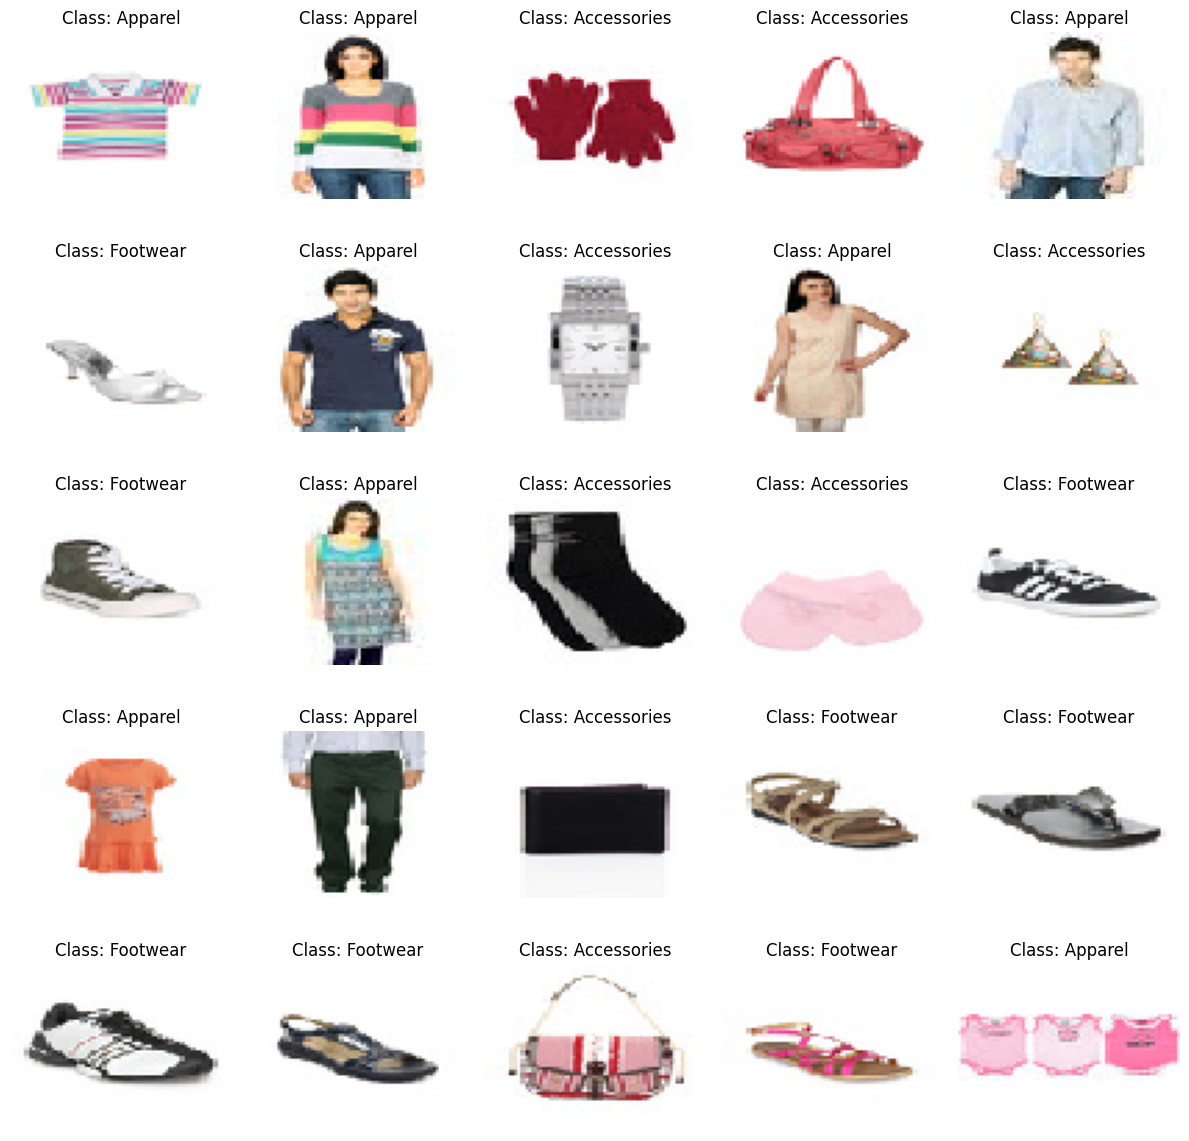

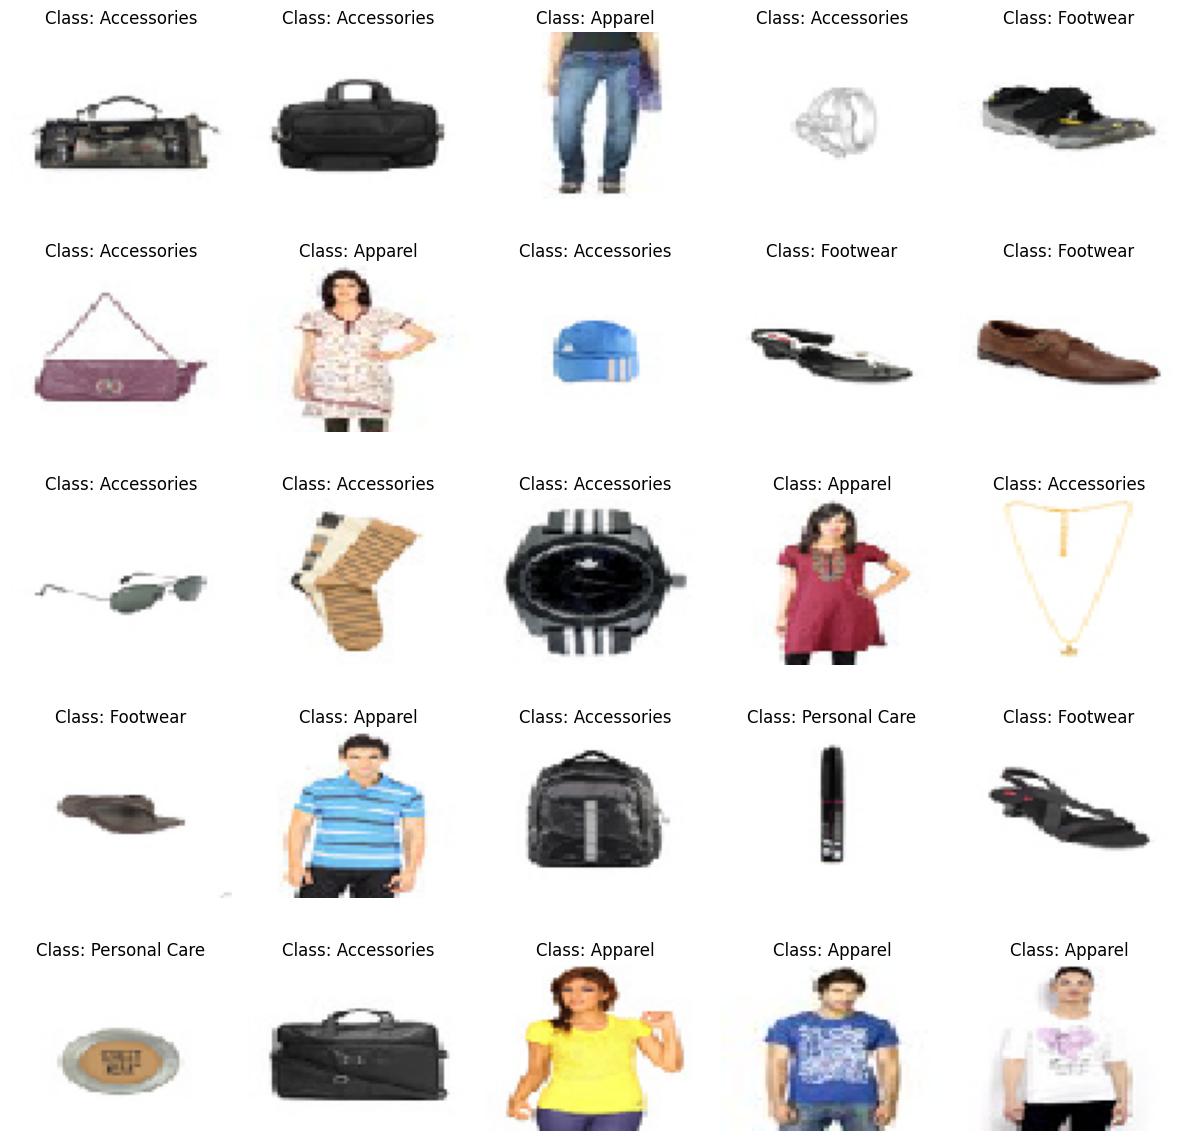

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_from_generator(generator, num_images):
    # Get a batch of images and labels
    images, labels = next(generator)

    # Get the class indices and labels
    class_indices = generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    plt.figure(figsize=(12, 12))

    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].astype('uint8'))

        # Determine the label
        if len(labels[i]) > 1:  # if categorical
            label_index = np.argmax(labels[i])
        else:  # if binary
            label_index = int(labels[i])

        plt.title(f"Class: {class_labels[label_index]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display 25 images from the training generator
plot_images_from_generator(training_generator, 25)

# Display 25 images from the validation generator
plot_images_from_generator(validation_generator, 25)


8/8 [==============================] - 0s 5ms/step


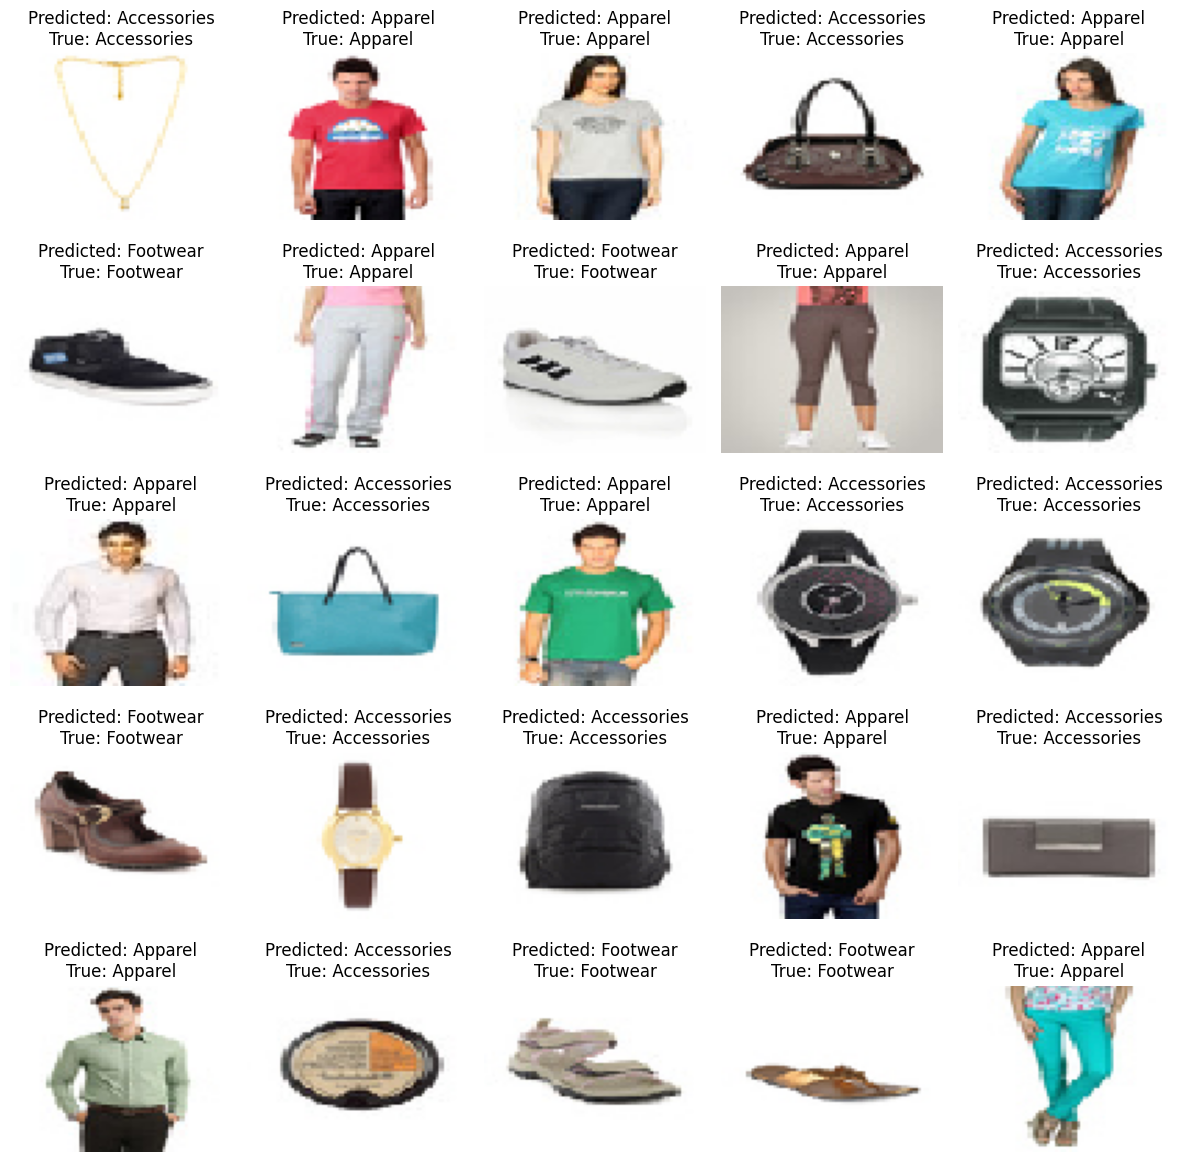

8/8 [==============================] - 0s 5ms/step


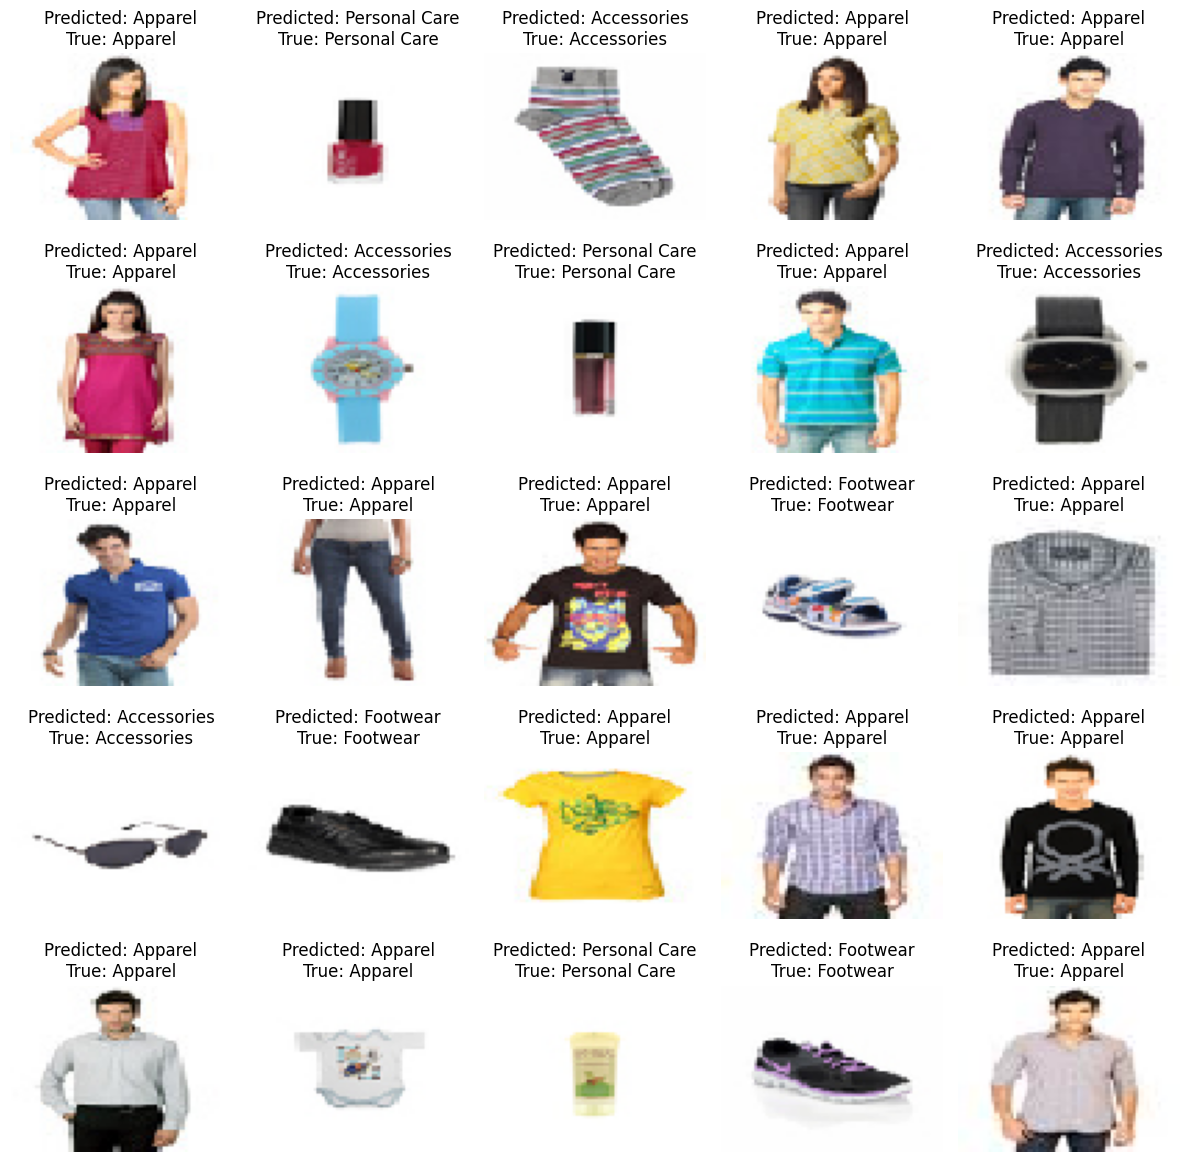

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('model.h5')

def plot_images_with_predictions(generator, model, num_images):
    # Get a batch of images and labels
    images, true_labels = next(generator)

    # Predict the classes
    predictions = model.predict(images)

    # Get the class indices and labels
    class_indices = generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    plt.figure(figsize=(12, 12))

    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].astype('uint8'))

        # Determine the predicted label
        if predictions.shape[1] > 1:  # if categorical
            predicted_label_index = np.argmax(predictions[i])
        else:  # if binary
            predicted_label_index = int(np.round(predictions[i][0]))

        predicted_label = class_labels[predicted_label_index]

        # Determine the true label
        if true_labels.shape[1] > 1:  # if categorical
            true_label_index = np.argmax(true_labels[i])
        else:  # if binary
            true_label_index = int(true_labels[i])

        true_label = class_labels[true_label_index]

        plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display 25 images from the training generator with predictions
plot_images_with_predictions(training_generator, model, 25)

# Display 25 images from the validation generator with predictions
plot_images_with_predictions(validation_generator, model, 25)


1/1 [==============================] - 0s 132ms/step


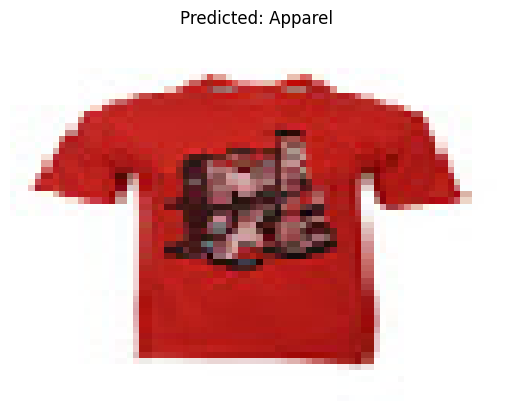

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Load your trained model
model = load_model('model.h5')

# Assuming class labels are the same as those used during training
class_indices = training_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def predict_image_class(model, img_path, target_size):
    # Preprocess the image
    img_array = load_and_preprocess_image(img_path, target_size)

    # Predict the class
    predictions = model.predict(img_array)

    # Determine the predicted label
    if predictions.shape[1] > 1:  # if categorical
        predicted_label_index = np.argmax(predictions[0])
    else:  # if binary
        predicted_label_index = int(np.round(predictions[0][0]))

    predicted_label = class_labels[predicted_label_index]

    # Load and display the image
    img = image.load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example usage:
img_path = '/content/fashion-product-images-small/images/10009.jpg'#'path_to_your_image.jpg'
target_size = (60, 80)  # Change to the input size of your model
predict_image_class(model, img_path, target_size)


1/1 [==============================] - 0s 124ms/step
Prediction probabilities:
Accessories: 0.0007
Apparel: 0.9993
Footwear: 0.0000
Free Items: 0.0000
Home: 0.0000
Personal Care: 0.0000
Sporting Goods: 0.0000


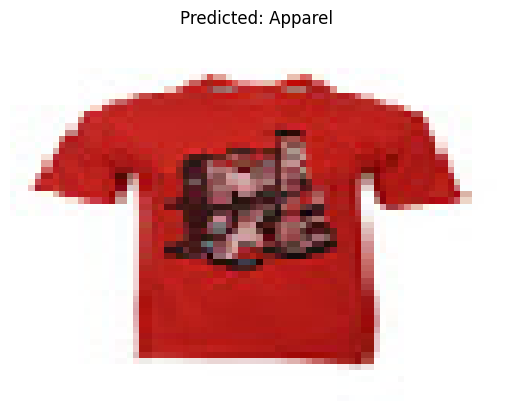

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Load your trained model
model = load_model('model.h5')

# Assuming class labels are the same as those used during training
class_indices = training_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def predict_image_class(model, img_path, target_size):
    # Preprocess the image
    img_array = load_and_preprocess_image(img_path, target_size)

    # Predict the class
    predictions = model.predict(img_array)

    # Determine the predicted label and print key-value pairs
    prediction_dict = {}
    if predictions.shape[1] > 1:  # if categorical
        for i, prob in enumerate(predictions[0]):
            prediction_dict[class_labels[i]] = prob
        predicted_label_index = np.argmax(predictions[0])
    else:  # if binary
        prediction_dict[class_labels[1]] = predictions[0][0]
        prediction_dict[class_labels[0]] = 1 - predictions[0][0]
        predicted_label_index = int(np.round(predictions[0][0]))

    predicted_label = class_labels[predicted_label_index]

    # Print key-value pairs
    print("Prediction probabilities:")
    for label, prob in prediction_dict.items():
        print(f"{label}: {prob:.4f}")

    # Load and display the image
    img = image.load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example usage:
img_path = '/content/fashion-product-images-small/images/10009.jpg'#'path_to_your_image.jpg'
target_size = (60, 80)  # Change to the input size of your model
predict_image_class(model, img_path, target_size)


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
print(model.summary())  # This will show the input layer and expected shape


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
from tensorflow.keras.models import load_model

# Specify the correct path to your model file
model_path = '/content/model.h5'  # Replace with the actual path
model = load_model(model_path)
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
processed_image = processed_image.reshape((1, -1))  # Reshape to (1, 784) if necessary


NameError: name 'processed_image' is not defined

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# ... (rest of your imports and functions)

# Load and preprocess the image
img_path = '/content/drive/MyDrive/FPC/images/10000.jpg'
target_size = (60, 80)
img = image.load_img(img_path, target_size=target_size)
processed_image = image.img_to_array(img)

# Now you can reshape the processed image
processed_image = processed_image.reshape((1, -1))  # Reshape to (1, 784) if necessary

# ... (rest of your code)

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/content/drive/MyDrive/FPC/images/10000.jpg'
target_size = (28, 28)  # Resize to 28x28 pixels
img = image.load_img(img_path, target_size=target_size, color_mode="grayscale")
processed_image = image.img_to_array(img)

# Now reshape to (1, 784) to match the model's expected input
processed_image = processed_image.reshape((1, -1))

# Normalize the image if needed (e.g., divide by 255)
processed_image = processed_image / 255.0

# Prediction
prediction = model.predict(processed_image).tolist()

# ... (rest of your code)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [17]:
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)


Predicted class: 7
